In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import klib
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [3]:
df=pd.read_csv('Housing.csv')

In [5]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000.0,7420.0,4,2.0,3.0,yes,no,no,no,yes,2.0,yes,furnished
1,12250000.0,8960.0,4,4.0,4.0,yes,no,no,no,yes,3.0,no,furnished
2,12250000.0,9960.0,3,2.0,2.0,yes,no,yes,no,no,2.0,yes,semi-furnished
3,12215000.0,7500.0,4,2.0,2.0,yes,no,yes,no,yes,3.0,yes,furnished
4,11410000.0,7420.0,4,1.0,2.0,yes,yes,yes,no,yes,2.0,no,furnished


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   price             541 non-null    float64
 1   area              541 non-null    float64
 2   bedrooms          545 non-null    int64  
 3   bathrooms         542 non-null    float64
 4   stories           542 non-null    float64
 5   mainroad          542 non-null    object 
 6   guestroom         543 non-null    object 
 7   basement          540 non-null    object 
 8   hotwaterheating   543 non-null    object 
 9   airconditioning   543 non-null    object 
 10  parking           544 non-null    float64
 11  prefarea          542 non-null    object 
 12  furnishingstatus  542 non-null    object 
dtypes: float64(5), int64(1), object(7)
memory usage: 55.5+ KB


# data preprocessing 

# bush kataklarni kurib olamiz

In [11]:
df.isnull().sum()

price               4
area                4
bedrooms            0
bathrooms           3
stories             3
mainroad            3
guestroom           2
basement            5
hotwaterheating     2
airconditioning     2
parking             1
prefarea            3
furnishingstatus    3
dtype: int64

# bush kataklarni klib yordamida tuldiramiz 

GridSpec(6, 6)

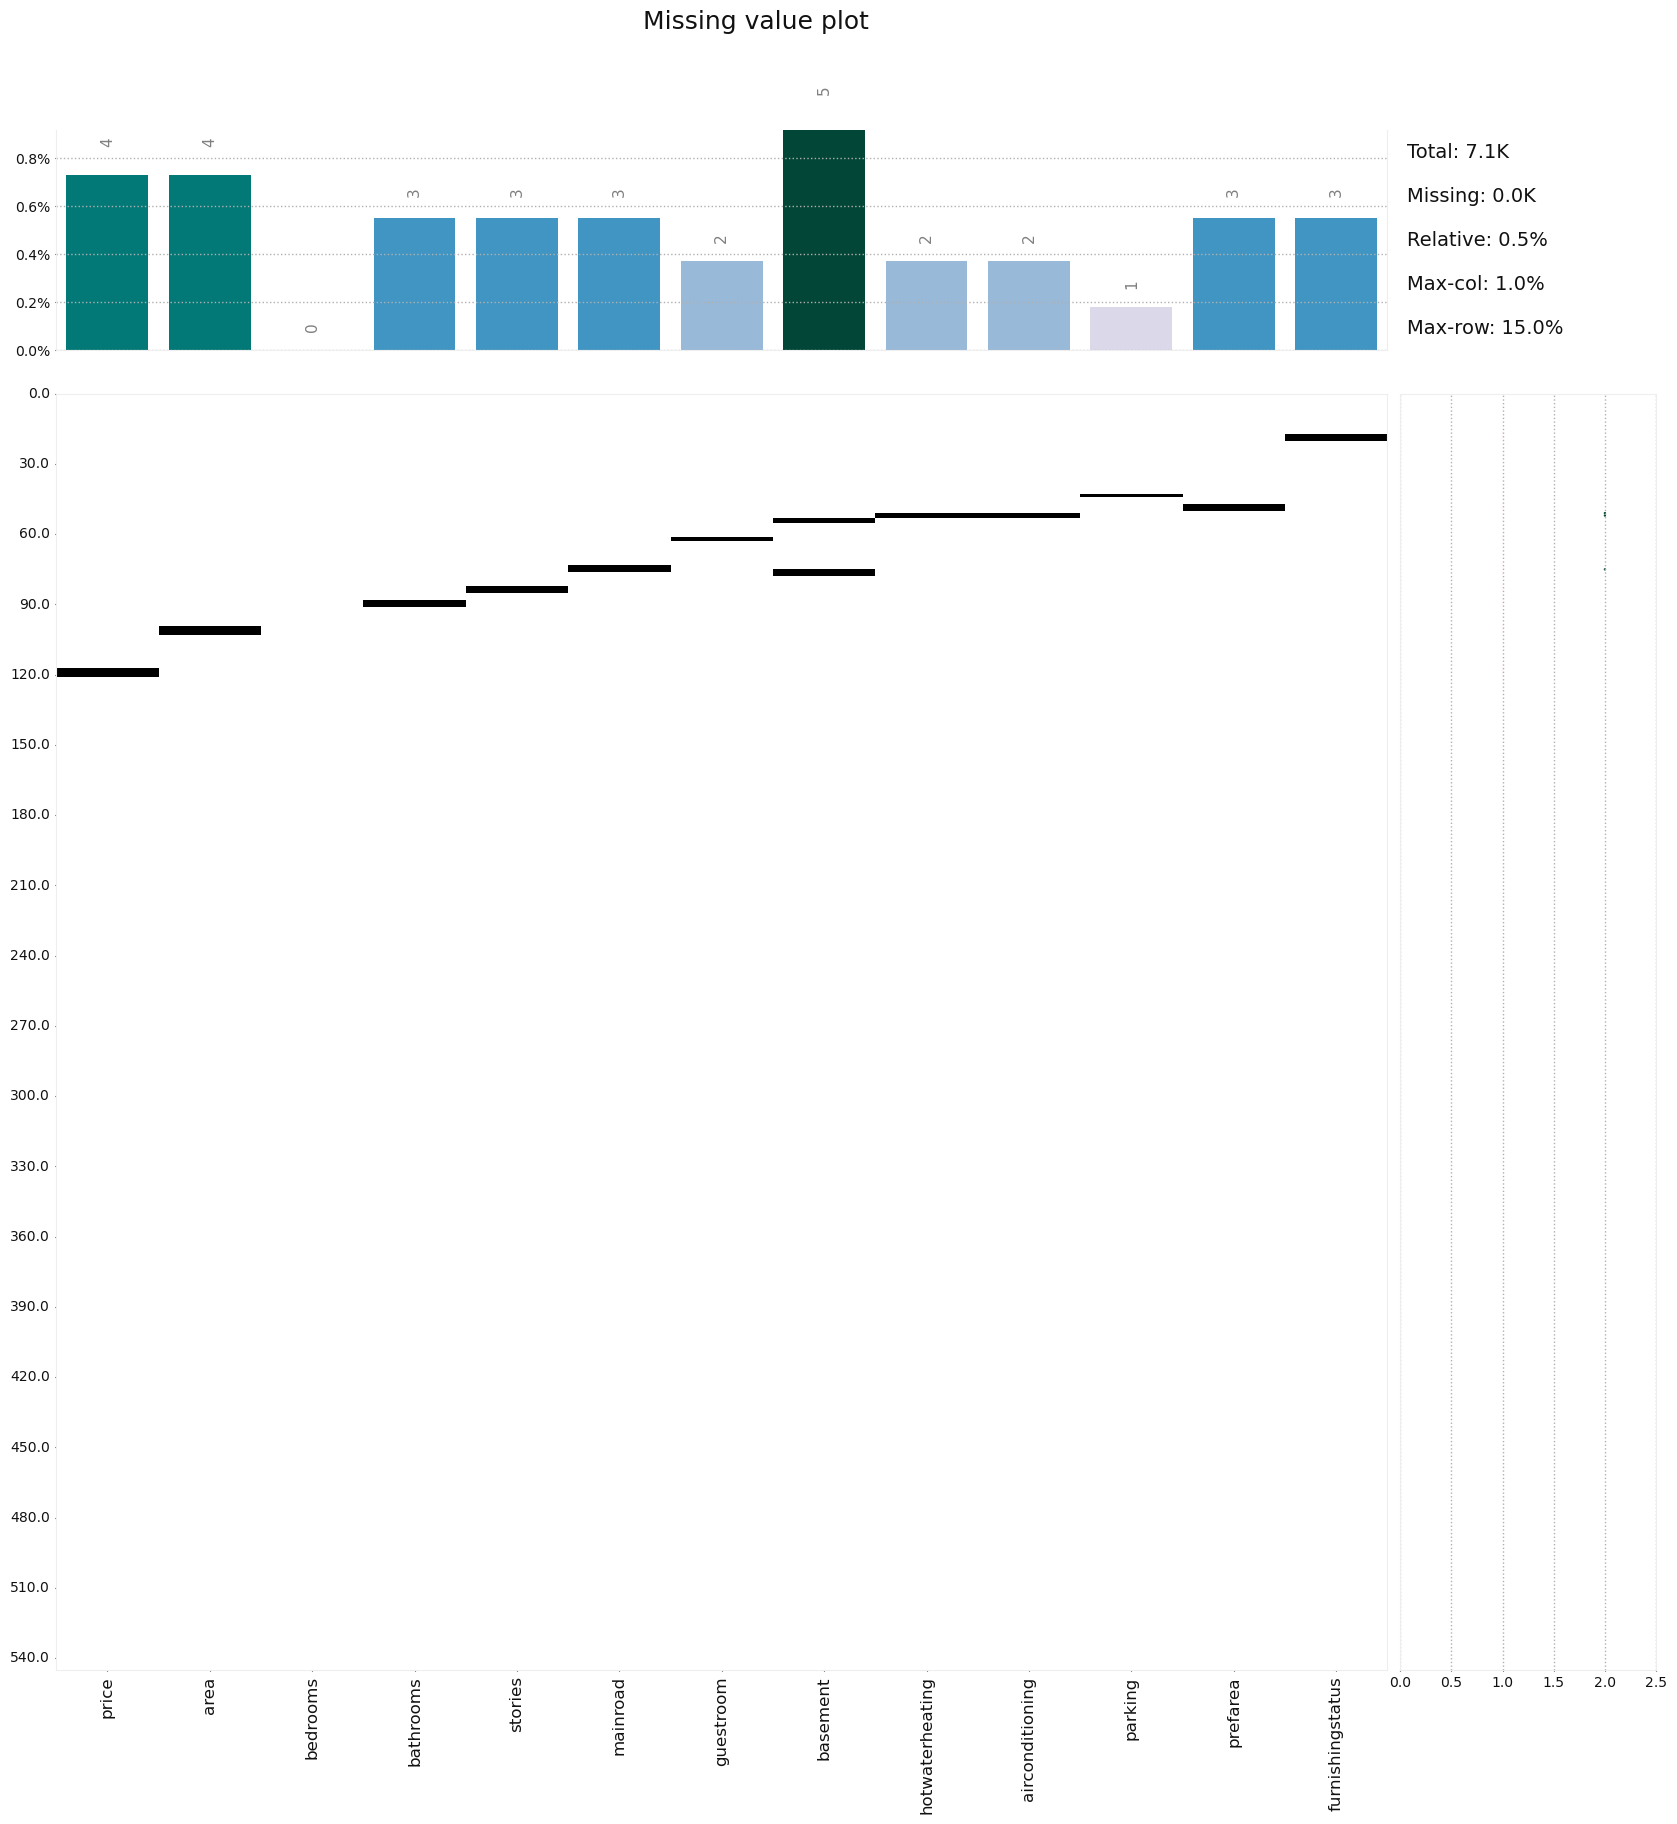

In [14]:
klib.missingval_plot(df)

<Axes: title={'center': 'Feature-correlation (pearson)'}>

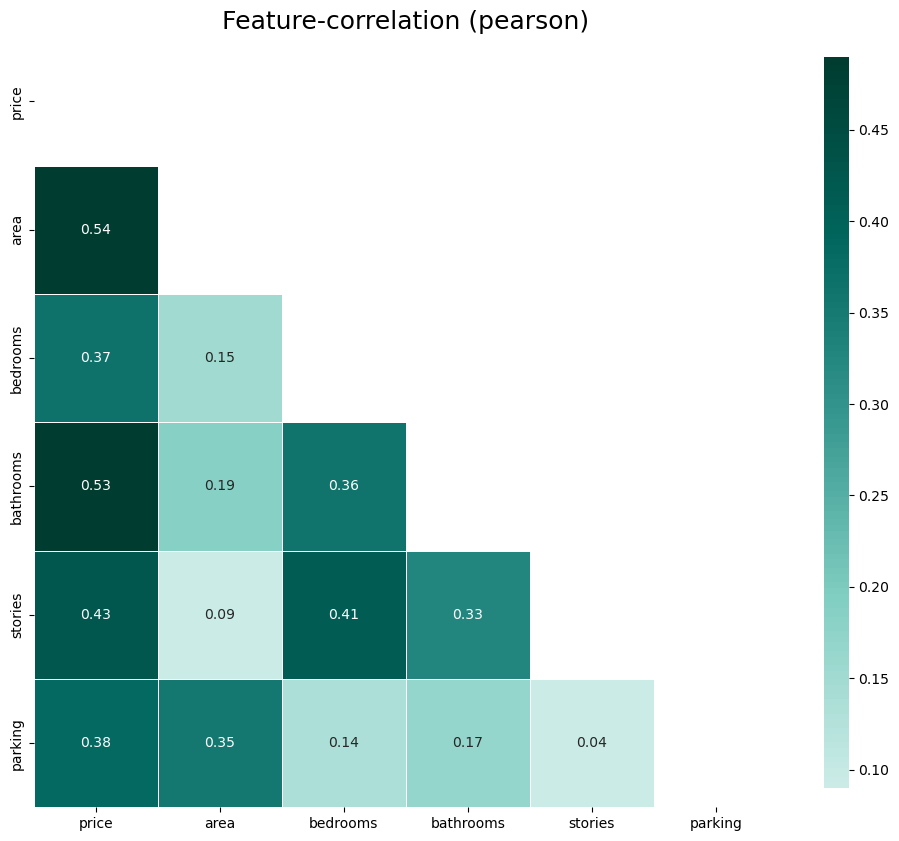

In [16]:
klib.corr_plot(df)

<Axes: xlabel='parking', ylabel='Density'>

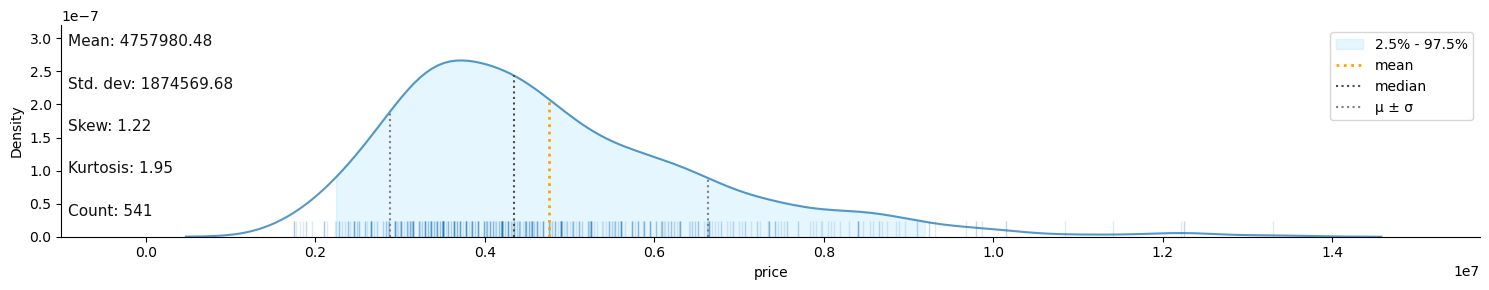

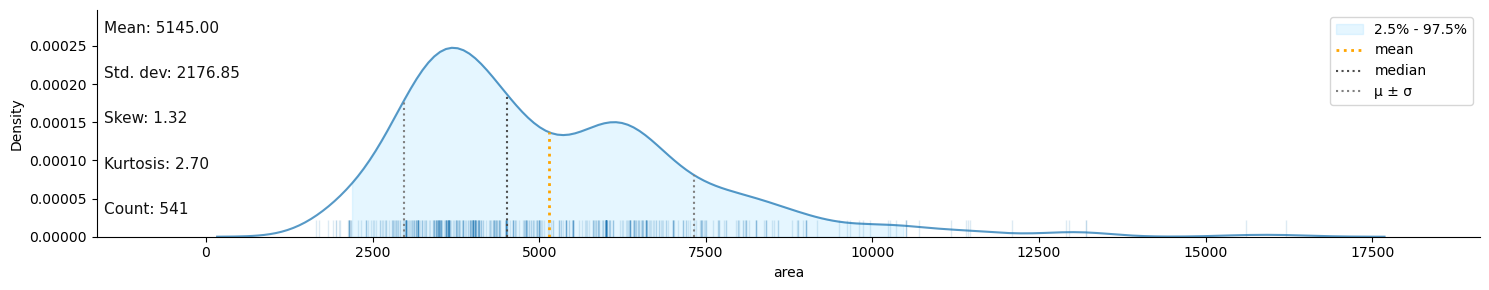

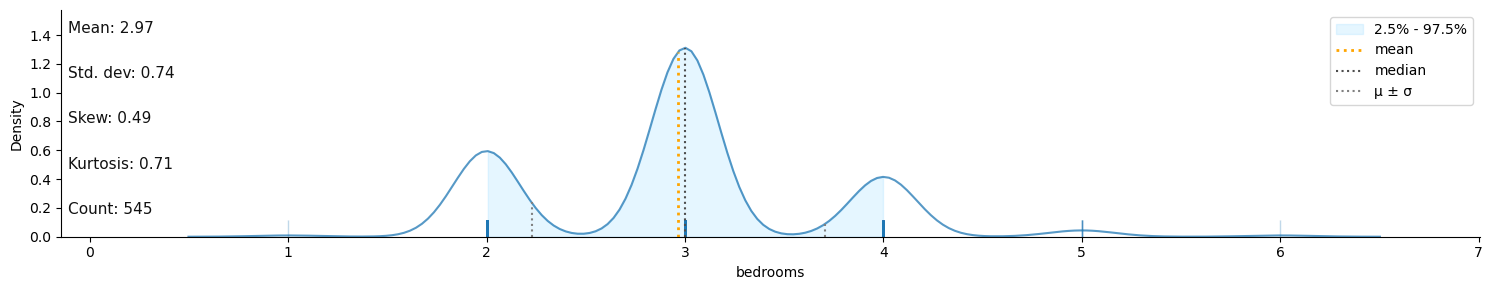

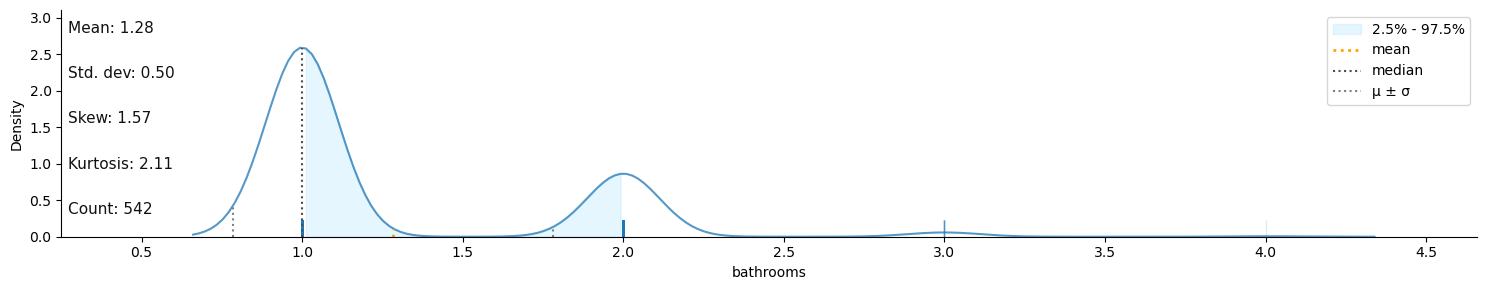

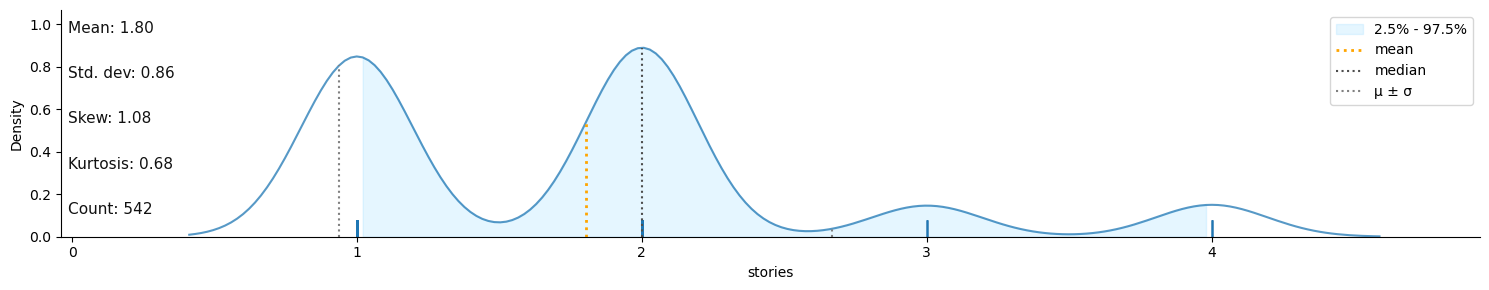

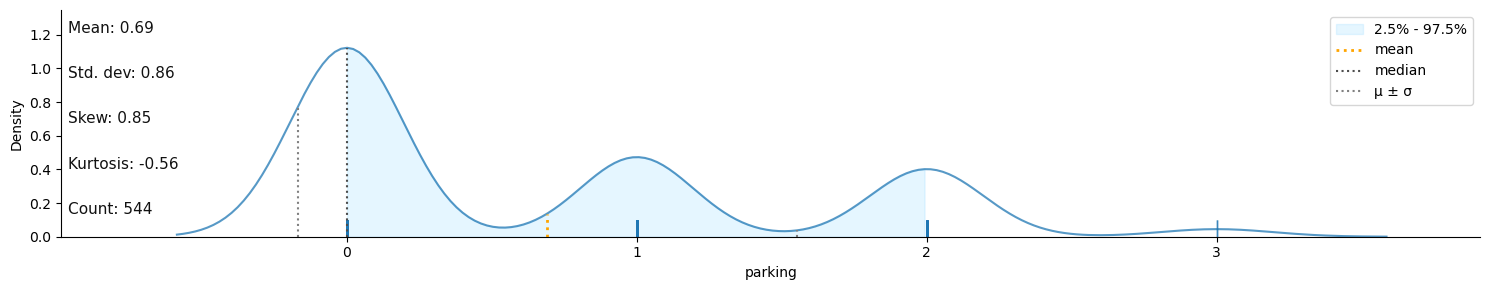

In [18]:
klib.dist_plot(df)

# klib orqali datani tozalash (hajmini kamaytirish)

In [21]:
df_cleaned=klib.data_cleaning(df)

Shape of cleaned data: (545, 13) - Remaining NAs: 35


Dropped rows: 0
     of which 0 duplicates. (Rows (first 150 shown): [])

Dropped columns: 0
     of which 0 single valued.     Columns: []
Dropped missing values: 0
Reduced memory by at least: 0.03 MB (-60.0%)



In [23]:
df=df_cleaned

In [25]:
df.isnull().sum()

price               4
area                4
bedrooms            0
bathrooms           3
stories             3
mainroad            3
guestroom           2
basement            5
hotwaterheating     2
airconditioning     2
parking             1
prefarea            3
furnishingstatus    3
dtype: int64

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   price             541 non-null    float32 
 1   area              541 non-null    float32 
 2   bedrooms          545 non-null    int8    
 3   bathrooms         542 non-null    float32 
 4   stories           542 non-null    float32 
 5   mainroad          542 non-null    category
 6   guestroom         543 non-null    category
 7   basement          540 non-null    category
 8   hotwaterheating   543 non-null    category
 9   airconditioning   543 non-null    category
 10  parking           544 non-null    float32 
 11  prefarea          542 non-null    category
 12  furnishingstatus  542 non-null    category
dtypes: category(7), float32(5), int8(1)
memory usage: 15.9 KB


# muammoli ustunlar ustida ishlaymiz

In [42]:
df['usd_chf'].value_counts

<bound method IndexOpsMixin.value_counts of 0       1.0206
1       1.0264
2       1.0340
3       1.0453
4       1.0426
         ...  
3714    0.8654
3715    0.8659
3716       NaN
3717       NaN
3718       NaN
Name: usd_chf, Length: 3719, dtype: float32>

In [48]:
df['usd_chf'].unique()

array([1.0206, 1.0264, 1.034 , ..., 0.8621, 0.8642, 0.8659], dtype=float32)

# muammoli ustunlardagi missing valuelarni umumiy formular orqali tuldirib ketamiz 

In [51]:
missing_values = df.isnull().sum()>0
for col in df.columns[missing_values]:
    if df[col].dtype=='object':
        df[col].fillna(df[col].mode()[0],inplace=True)
    else:
        df[col].fillna(df[col].mean(),inplace=True)

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_4432\929127255.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mean(),inplace=True)


In [53]:
df.isnull().sum()

date                  0
sp500_open            0
sp500_high            0
sp500_low             0
sp500_close           0
sp500_volume          0
sp500_high_low        0
nasdaq_open           0
nasdaq_high           0
nasdaq_low            0
nasdaq_close          0
nasdaq_volume         0
nasdaq_high_low       0
usd_chf               0
eur_usd               0
silver_open           0
silver_high           0
silver_low            0
silver_close          0
silver_volume         0
silver_high_low       0
oil_open              0
oil_high              0
oil_low               0
oil_close             0
oil_volume            0
oil_high_low          0
platinum_open         0
platinum_high         0
platinum_low          0
platinum_close        0
platinum_volume       0
platinum_high_low     0
palladium_open        0
palladium_high        0
palladium_low         0
palladium_close       0
palladium_volume      0
palladium_high_low    0
gold_open             0
gold_high             0
gold_low        

In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3719 entries, 0 to 3718
Data columns (total 44 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   date                3719 non-null   string 
 1   sp500_open          3719 non-null   float32
 2   sp500_high          3719 non-null   float32
 3   sp500_low           3719 non-null   float32
 4   sp500_close         3719 non-null   float32
 5   sp500_volume        3719 non-null   float64
 6   sp500_high_low      3719 non-null   float32
 7   nasdaq_open         3719 non-null   float32
 8   nasdaq_high         3719 non-null   float32
 9   nasdaq_low          3719 non-null   float32
 10  nasdaq_close        3719 non-null   float32
 11  nasdaq_volume       3719 non-null   float64
 12  nasdaq_high_low     3719 non-null   float32
 13  usd_chf             3719 non-null   float32
 14  eur_usd             3719 non-null   float32
 15  silver_open         3719 non-null   float32
 16  silver

# data ustunini yil, oy, kunga uzgartirib olamiz

In [58]:
df['date']=pd.to_datetime(df['date'])

In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3719 entries, 0 to 3718
Data columns (total 44 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   date                3719 non-null   datetime64[ns]
 1   sp500_open          3719 non-null   float32       
 2   sp500_high          3719 non-null   float32       
 3   sp500_low           3719 non-null   float32       
 4   sp500_close         3719 non-null   float32       
 5   sp500_volume        3719 non-null   float64       
 6   sp500_high_low      3719 non-null   float32       
 7   nasdaq_open         3719 non-null   float32       
 8   nasdaq_high         3719 non-null   float32       
 9   nasdaq_low          3719 non-null   float32       
 10  nasdaq_close        3719 non-null   float32       
 11  nasdaq_volume       3719 non-null   float64       
 12  nasdaq_high_low     3719 non-null   float32       
 13  usd_chf             3719 non-null   float32     

In [62]:
df['year']=df['date'].dt.year
df['month']=df['date'].dt.month
df['day']=df['date'].dt.day

In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3719 entries, 0 to 3718
Data columns (total 47 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   date                3719 non-null   datetime64[ns]
 1   sp500_open          3719 non-null   float32       
 2   sp500_high          3719 non-null   float32       
 3   sp500_low           3719 non-null   float32       
 4   sp500_close         3719 non-null   float32       
 5   sp500_volume        3719 non-null   float64       
 6   sp500_high_low      3719 non-null   float32       
 7   nasdaq_open         3719 non-null   float32       
 8   nasdaq_high         3719 non-null   float32       
 9   nasdaq_low          3719 non-null   float32       
 10  nasdaq_close        3719 non-null   float32       
 11  nasdaq_volume       3719 non-null   float64       
 12  nasdaq_high_low     3719 non-null   float32       
 13  usd_chf             3719 non-null   float32     

# original date ustunini tashlab yuboramiz

In [71]:
df.drop('date', axis=1, inplace=True)

In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3719 entries, 0 to 3718
Data columns (total 46 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   sp500_open          3719 non-null   float32
 1   sp500_high          3719 non-null   float32
 2   sp500_low           3719 non-null   float32
 3   sp500_close         3719 non-null   float32
 4   sp500_volume        3719 non-null   float64
 5   sp500_high_low      3719 non-null   float32
 6   nasdaq_open         3719 non-null   float32
 7   nasdaq_high         3719 non-null   float32
 8   nasdaq_low          3719 non-null   float32
 9   nasdaq_close        3719 non-null   float32
 10  nasdaq_volume       3719 non-null   float64
 11  nasdaq_high_low     3719 non-null   float32
 12  usd_chf             3719 non-null   float32
 13  eur_usd             3719 non-null   float32
 14  silver_open         3719 non-null   float32
 15  silver_high         3719 non-null   float32
 16  silver

# Training and Testing 

In [78]:
x=df.drop('sp500_close', axis=1)
y=df['sp500_close']

In [80]:
x_train, x_temp, y_train, y_temp = train_test_split(x, y, test_size=0.3, random_state=42)

x_val, x_test, y_val, y_test = train_test_split(x_temp, y_temp, test_size=0.5, random_state=42)

In [82]:
x_train.shape, x_val.shape, x_test.shape

((2603, 45), (558, 45), (558, 45))

In [84]:
y_train.shape, y_val.shape, y_test.shape

((2603,), (558,), (558,))

# Modelni tanlaymiz

In [87]:
model=LinearRegression()
model.fit(x_train,y_train)
y_pred=model.predict(x_val)


In [89]:
len(y_pred)

558

In [91]:
y_pred

array([179.37801487, 358.81200406, 142.07799016, 414.97817103,
       210.12994177, 411.22125752, 125.73321808, 132.10874928,
       140.61331195, 136.11295203, 188.58404916, 333.67877452,
       221.19385207, 154.8864113 , 238.64154006, 196.09439275,
       554.90554248, 129.43015964, 138.51971942, 210.50657657,
       411.77638836, 502.05456289, 427.89958152, 241.68021053,
       277.54888978, 255.45054156, 132.25400471, 411.93835075,
       288.86067876, 196.1560227 , 169.75920051, 287.43138495,
       247.19084577, 210.11638812, 265.77106189, 282.92889911,
       116.46983355, 359.38209555, 124.65320012, 206.55973607,
       201.02289749, 110.45180855, 280.59433338, 437.54829294,
       127.89706766, 109.70793771, 185.29984537, 442.98293936,
       429.57389885, 292.186597  , 112.8317305 , 210.63672404,
       119.80950655, 133.87004534, 257.81966702, 183.64652264,
       186.21085082, 266.66228933, 453.39800814, 192.55632482,
       188.04183711, 341.88074564, 440.02400429, 273.93

In [93]:
y_test[0]

114.93

# Modelni tekshiramiz

In [96]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 30870.791676688954
R-squared: -0.9353066547574551


In [98]:
# Scaling
scaler_x = StandardScaler()
scaler_y = StandardScaler()


x_train_scaled = scaler_x.fit_transform(x_train)
y_train_scaled = scaler_y.fit_transform(y_train.values.reshape(-1, 1))


x_val_scaled = scaler_x.transform(x_val)
x_test_scaled = scaler_x.transform(x_test)

# Fit the model on the scaled training data
model = LinearRegression()
model.fit(x_train_scaled, y_train_scaled)

# Predict on the scaled validation data
y_pred_scaled = model.predict(x_val_scaled)

# Inverse transform the predictions to get them back to the original scale
y_pred = scaler_y.inverse_transform(y_pred_scaled)

In [100]:
# Evaluate the model
mse = mean_squared_error(y_val, y_pred)
r2 = r2_score(y_val, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 0.23829329971908536
R-squared: 0.9999832380514688


In [102]:
# Define the model
model = LinearRegression()

# Define the k-fold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Perform cross-validation
cv_scores = cross_val_score(model, x, y, cv=kf, scoring='neg_mean_squared_error')

# Calculate the mean and standard deviation of the cross-validation scores
mean_cv_score = -cv_scores.mean()
std_cv_score = cv_scores.std()

print(f"Mean Cross-Validation MSE: {mean_cv_score}")
print(f"Standard Deviation of Cross-Validation MSE: {std_cv_score}")

Mean Cross-Validation MSE: 0.3108603479461075
Standard Deviation of Cross-Validation MSE: 0.03764153157063458
